In [ ]:
!pip install scikit-learn
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from matplotlib.colors import ListedColormap

import seaborn as sns

In [ ]:
df = pd.read_csv("dataset.csv")
display(df.head())

,Date,Price,Open,High,Low
0,09-Jun-24,69348.0,69311.0,69427.0,69137.0
1,08-Jun-24,69310.0,69347.0,69572.0,69222.0
2,07-Jun-24,69348.0,70793.0,71957.0,68621.0
3,06-Jun-24,70792.0,71084.0,71616.0,70179.0
4,05-Jun-24,71084.0,70551.0,71744.0,70397.0


In [ ]:
x = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

In [ ]:
print(x[:5])
print(y[:5])

[[69311. 69427.]
 [69347. 69572.]
 [70793. 71957.]
 [71084. 71616.]
 [70551. 71744.]]
[69137. 69222. 68621. 70179. 70397.]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)

print("x_train:", x_train[:5], "...")
print("")
print("x_test:", x_test[:5], "...")

x_train: [[-1.08507352 -1.06755431]
 [-0.38920251 -0.36139957]
 [-0.99716065 -1.02240661]
 [-1.0734492  -1.07953988]
 [-0.12292307 -0.04983696]] ...

x_test: [[ 0.46483543  0.46386562]
 [-1.06989203 -1.08630893]
 [ 1.3253525   1.30583608]
 [ 1.23959934  1.17262862]
 [ 1.29352855  1.35079747]] ...


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

imputer = SimpleImputer(strategy='mean')

x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

y_train = imputer.fit_transform(y_train.reshape(-1, 1)).ravel()
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(model.intercept_)
print(model.coef_)

42597.90980392157
[9737.36767085 5463.04139807]


In [ ]:
y_pred = model.predict(x_test)
print(y_pred[:5])

[49658.30036116 26245.42707677 62637.19090543 61074.46304609
 62572.93537224]


In [ ]:
from sklearn.metrics import r2_score
train_r2 = r2_score(y_test, y_pred)*100
test_r2 = r2_score(y_train, model.predict(x_train))*100
print("Test R-squared:", train_r2,"%")
print("Train R-squared:", test_r2,"%")

Test R-squared: 99.78406346903662 %
Train R-squared: 99.5877797709389 %


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)/1000000

print("MSE:", mse)

MSE: 0.5195156548641658


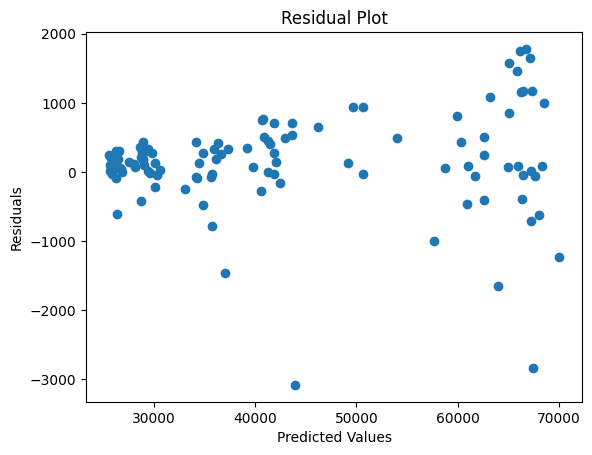

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

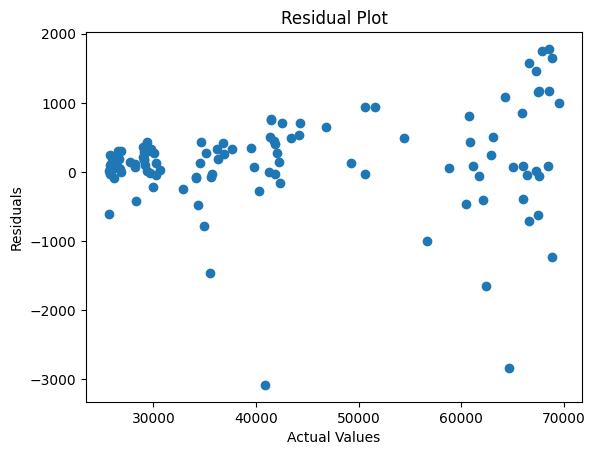

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

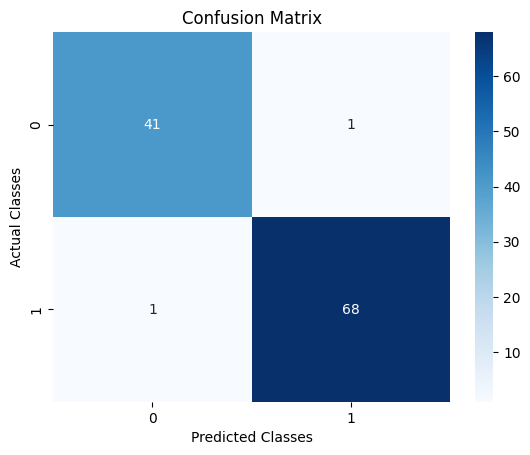

Accuracy: 98.1981981981982 %
Precision (macro): 0.9808488612836439
Recall (macro): 0.9808488612836439
F1-score (macro): 0.9808488612836439


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_test_norm = (y_test - y_test.min()) / (y_test.max() - y_test.min())
y_pred_norm = (y_pred - y_pred.min()) / (y_pred.max() - y_pred.min())

threshold = 0.2

y_test_classes = np.where(y_test_norm > threshold, 1, 0)
y_pred_classes = np.where(y_pred_norm > threshold, 1, 0)
cm = confusion_matrix(y_test_classes, y_pred_classes)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

Accuracy = accuracy_score(y_test_classes, y_pred_classes)*100
precision = precision_score(y_test_classes, y_pred_classes, average='macro')
recall = recall_score(y_test_classes, y_pred_classes, average='macro')
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')

print("Accuracy:", Accuracy, "%")
print("Precision (macro):", precision)
print("Recall (macro):", recall)
print("F1-score (macro):", f1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        69

    accuracy                           0.98       111
   macro avg       0.98      0.98      0.98       111
weighted avg       0.98      0.98      0.98       111



In [ ]:
hasil = pd.DataFrame({
    'Actual': y_test_classes,
    'Predict': y_pred_classes
})
print(hasil)
hasil.to_excel('predictions normalize.xlsx',  index=False)

     Actual  Predict
0         1        1
1         0        0
2         1        1
3         1        1
4         1        1
..      ...      ...
106       1        1
107       0        0
108       0        0
109       1        0
110       1        1

[111 rows x 2 columns]


In [ ]:
output = pd.DataFrame({
    'Actual': y_test,
    'Predict': y_pred
})
print(output)
output.to_excel('predictions denormalize.xlsx',  index=False)

      Actual       Predict
0    50592.0  49658.300361
1    26162.0  26245.427077
2    62889.0  62637.190905
3    61157.0  61074.463046
4    63075.0  62572.935372
..       ...           ...
106  42093.0  41814.078231
107  29094.0  28925.062515
108  28170.0  28054.967522
109  34601.0  34168.708307
110  54464.0  53968.165118

[111 rows x 2 columns]
